Number of images loaded: 6877


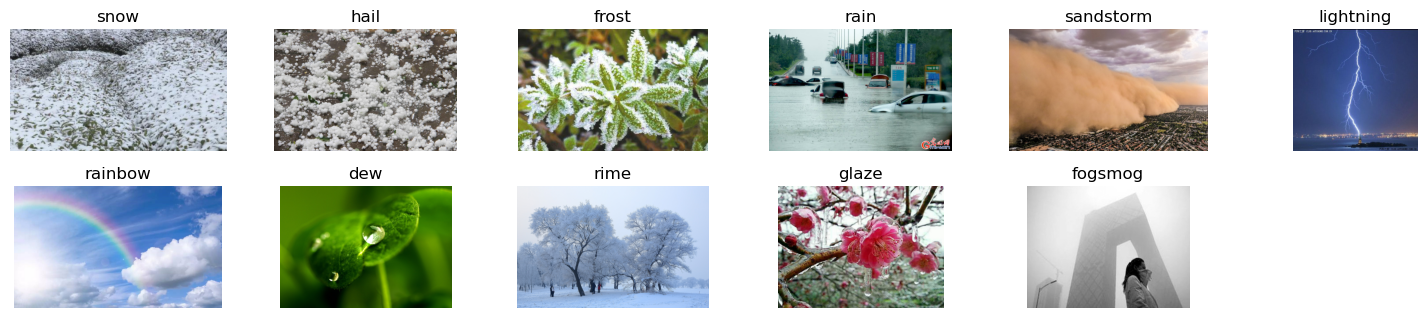

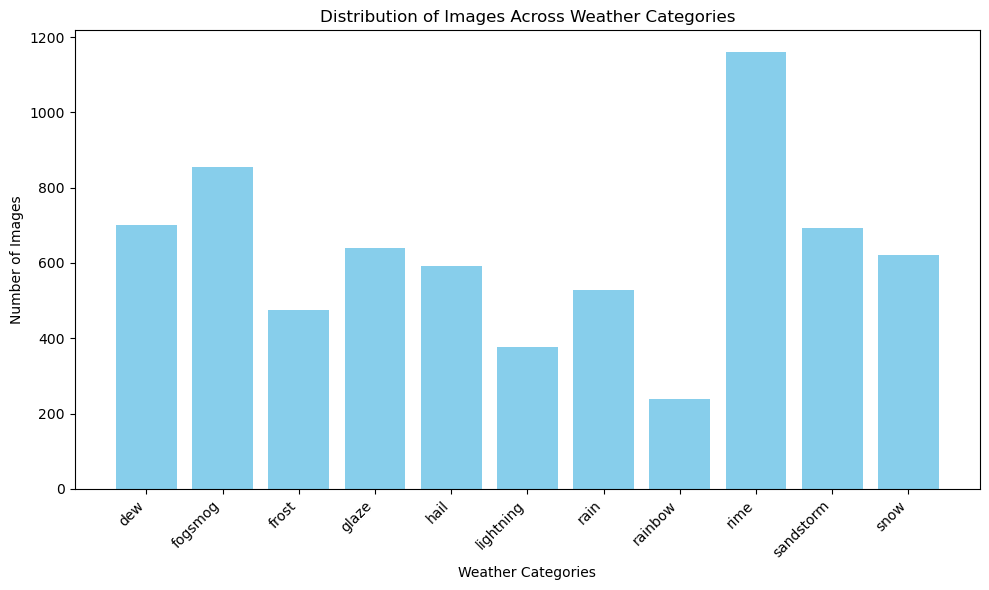

In [1]:
from PIL import Image
import os

# Directory containing your image dataset categorized by weather types
dataset_dir = 'C:\dataset'

# List to store images and their corresponding categories
image_list = []
categories = []

# Iterate through each category (sub-directory) in the dataset directory
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        for file in os.listdir(category_dir):
            file_path = os.path.join(category_dir, file)
            if file.endswith(('jpg', 'jpeg', 'png')):  # Filter by image file extensions
                image = Image.open(file_path)
                image_list.append(image)
                categories.append(category)

# Example: Print the number of images loaded
print(f"Number of images loaded: {len(image_list)}")

#Step 2
import matplotlib.pyplot as plt
# Plotting example images from different categories
num_categories = len(set(categories))  # Number of unique categories
plt.figure(figsize=(15, 8))
for i, category in enumerate(set(categories)):
    # Find the first image in the current category
    image_index = categories.index(category)
    image = image_list[image_index]
   
    plt.subplot(5, (num_categories + 1) // 2, i + 1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()

#step3
import matplotlib.pyplot as plt
from collections import Counter
# Count occurrences of each category using Counter from collections module
category_counts = Counter(categories)
# Extract categories and their corresponding counts
categories = list(category_counts.keys())
counts = list(category_counts.values())
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Weather Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Weather Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 1. RESNET152V2 MODEL

In [2]:
from tensorflow.keras.models import load_model
# Load the  model
Resnet152V2_loaded = load_model('ResNet152V2_model.h5')

import pickle
# Loading the history
with open('Resnet152V2_history.pkl', 'rb') as file:
    Resnet152V2_history = pickle.load(file)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

Rvalidation_generator = train_datagen.flow_from_directory(
    'C:/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # use 'categorical' for multiple classes
    seed=20,
    subset='validation'
)

Found 1372 images belonging to 11 classes.


In [4]:
Resnet152V2_loss, Resnet152V2_accuracy = Resnet152V2_loaded.evaluate(Rvalidation_generator)
print("Validation Loss:", Resnet152V2_loss)
print("Validation Accuracy:", Resnet152V2_accuracy)


43/43 [==============================] - 272s 6s/step - loss: 0.7615 - accuracy: 0.8717
Validation Loss: 0.7614967823028564
Validation Accuracy: 0.8717201352119446


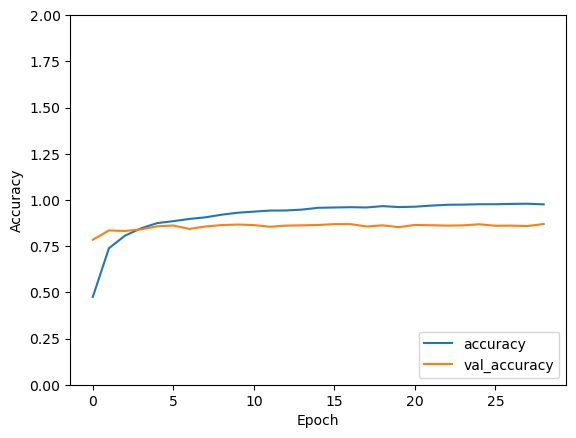

In [5]:
# Step 12: Visualize training history
import matplotlib.pyplot as plt
plt.plot(Resnet152V2_history['accuracy'] , label='accuracy')
plt.plot(Resnet152V2_history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

# 2.XCEPTION MODEL

In [6]:
from tensorflow.keras.models import load_model
# Load the  model
Xception_loaded = load_model('Xceptionn2_model.h5')
import pickle
# Loading the history
with open('Xceptionn2_history.pkl', 'rb') as file:
    Xception_history = pickle.load(file)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

Xvalidation_generator = train_datagen.flow_from_directory(
    'C:/dataset',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical', # use 'categorical' for multiple classes
    seed=20,
    subset='validation'
)

Found 1372 images belonging to 11 classes.


In [8]:
Xception_loss, Xception_accuracy = Xception_loaded.evaluate(Xvalidation_generator)
print("Validation Loss:", Xception_loss)
print("Validation Accuracy:", Xception_accuracy)

43/43 [==============================] - 237s 5s/step - loss: 0.7357 - accuracy: 0.8564
Validation Loss: 0.7357068061828613
Validation Accuracy: 0.8564140200614929


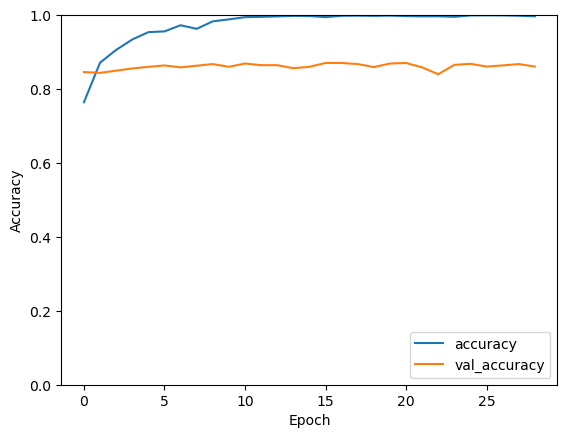

In [9]:
# Step 12: Visualize training history
import matplotlib.pyplot as plt
plt.plot(Xception_history['accuracy'] , label='accuracy')
plt.plot(Xception_history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 3.MOBILENET MODEL

In [10]:
from tensorflow.keras.models import load_model
# Load the  model
MobileNet_loaded = load_model('MobileNetV2_model.h5')


In [11]:
import pickle
# Loading the history
with open('MobileNetV2_history.pkl', 'rb') as file:
    MobileNet_history = pickle.load(file)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

Mvalidation_generator = train_datagen.flow_from_directory(
    'C:/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # use 'categorical' for multiple classes
    seed=42,
    subset='validation'
)

Found 1372 images belonging to 11 classes.


In [13]:
MobileNet_loss, MobileNet_accuracy = MobileNet_loaded.evaluate(Mvalidation_generator)
print("Validation Loss:", MobileNet_loss)
print("Validation Accuracy:", MobileNet_accuracy)

43/43 [==============================] - 31s 672ms/step - loss: 0.5872 - accuracy: 0.8542
Validation Loss: 0.5871985554695129
Validation Accuracy: 0.8542274236679077


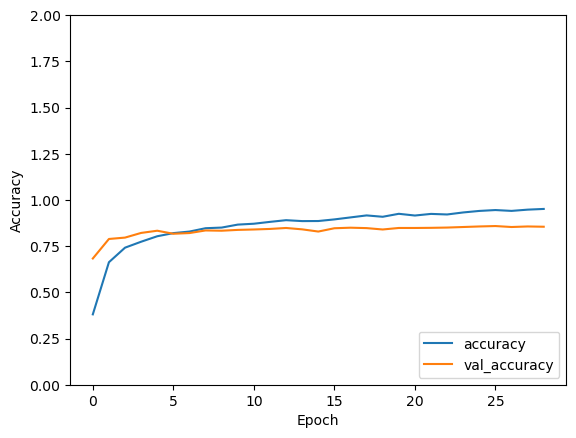

In [14]:
# Step 12: Visualize training history
import matplotlib.pyplot as plt
plt.plot(MobileNet_history['accuracy'] , label='accuracy')
plt.plot(MobileNet_history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

# 4. VGG16

In [15]:
from tensorflow.keras.models import load_model
# Load the  model
VGG16_loaded = load_model('VGG16_model.h5')

import pickle
# Loading the history
with open('VGG16_history.pkl', 'rb') as file:
    VGG16_history = pickle.load(file)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

Vvalidation_generator = train_datagen.flow_from_directory(
    'C:/dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # use 'categorical' for multiple classes
    seed=20,
    subset='validation'
)

Found 1372 images belonging to 11 classes.


In [17]:
VGG16_loss, VGG16_accuracy = VGG16_loaded.evaluate(Vvalidation_generator)
print("Validation Loss:", VGG16_loss)
print("Validation Accuracy:", VGG16_accuracy)

43/43 [==============================] - 245s 6s/step - loss: 0.5396 - accuracy: 0.8309
Validation Loss: 0.5395507216453552
Validation Accuracy: 0.8309037685394287


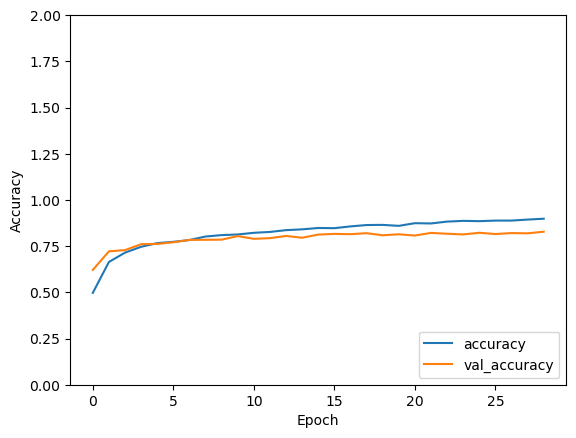

In [18]:
# Step 12: Visualize training history
import matplotlib.pyplot as plt
plt.plot(VGG16_history['accuracy'] , label='accuracy')
plt.plot(VGG16_history['val_accuracy'] , label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.show()

# Confusion Matrices

43/43 [==============================] - 249s 6s/step


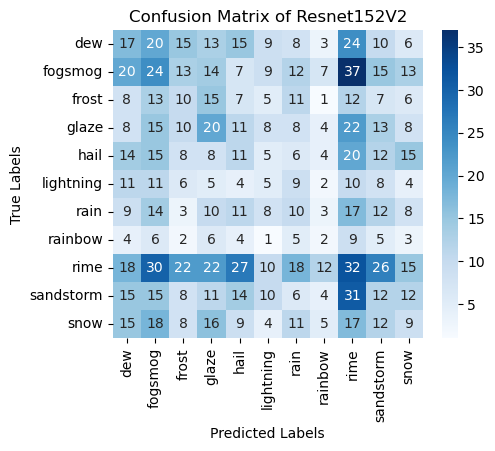

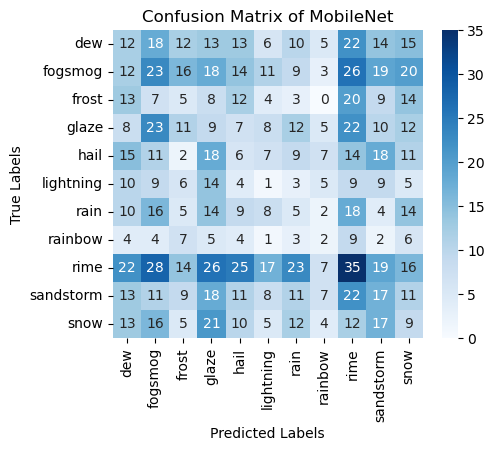

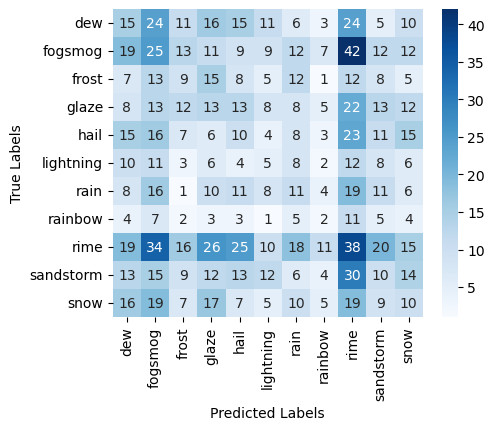

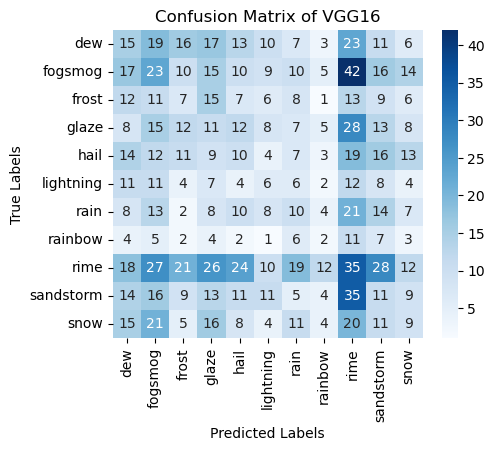

In [21]:
import numpy as np
from sklearn.metrics import precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def cmatrix(model,validation_generator):
    # Predict the classes for the validation set
    y_pred = model.predict(validation_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Get the true labels from the generator
    y_true = validation_generator.classes
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

cmatrix(Resnet152V2_loaded,Rvalidation_generator)
plt.title('Confusion Matrix of Resnet152V2')
cmatrix(MobileNet_loaded,Mvalidation_generator)
plt.title('Confusion Matrix of MobileNet')
cmatrix(Xception_loaded,Xvalidation_generator)#plt.title('Confusion Matrix of Xception')
cmatrix(VGG16_loaded,Vvalidation_generator)
plt.title('Confusion Matrix of VGG16')
plt.show()
